In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import geopandas as gpd
import contextily as cx
import matplotlib.ticker as mticker

# Import the data

In [49]:
import glob

# Read all csv files from folder

df = pd.DataFrame()
for file_name in glob.glob('./../../data-cleaned-unsupervised/'+'*.csv'):
    x = pd.read_csv(file_name, low_memory=False)
    df = pd.concat([df,x],axis=0)

In [50]:
df

lat        lon  std_acc_x  median_acc_x  std_acc_y  median_acc_y  \
0    46.844259  16.865110   0.017228      0.036328   0.081825      0.103029   
1    46.844256  16.864807   0.017228      0.036328   0.081825      0.103029   
2    46.844306  16.864376   0.017228      0.036328   0.081825      0.103029   
3    46.844389  16.864009   0.017228      0.036328   0.081825      0.103029   
4    46.844454  16.863623   0.017228      0.036328   0.081825      0.103029   
..         ...        ...        ...           ...        ...           ...   
959  46.825819  16.829702   0.030101      0.025698   0.053567      0.153389   
960  46.825768  16.829632   0.000000      0.025698   0.050109      0.065090   
961  46.825722  16.829497   0.000000      0.025698   0.050109      0.065090   
962  46.825803  16.829329   0.000000      0.025698   0.050109      0.065090   
963  46.825802  16.829296   0.000000      0.025698   0.050109      0.065090   

     std_acc_z  median_acc_z  std_gyr_x  median_gyr_x  std_gyr_y  \
0     0.079534      0.050651   0.096654      0.094314   0.006877   
1     0.079534      0.050651   0.096654      0.094314   0.006877   
2     0.079534      0.050651   0.096654      0.094314   0.006877   
3     0.079534      0.050651   0.096654      0.094314   0.006877   
4     0.079534      0.050651   0.096654      0.094314   0.006877   
..         ...           ...        ...           ...        ...   
959   0.039576      0.132030   0.080071      0.137673   0.150875   
960   0.011244      0.048801   0.022840      0.067893   0.046273   
961   0.011244      0.048801   0.022840      0.067893   0.046273   
962   0.011244      0.048801   0.022840      0.067893   0.046273   
963   0.011244      0.048801   0.022840      0.067893   0.046273   

     median_gyr_y  std_gyr_z  median_gyr_z  
0        0.039483   0.002751      0.000763  
1        0.039483   0.002751      0.000763  
2        0.039483   0.002751      0.000763  
3        0.039483   0.002751      0.000763  
4        0.039483   0.002751      0.000763  
..            ...        ...           ...  
959      0.198425   0.046479      0.001986  
960      0.177859   0.000000      0.001986  
961      0.177859   0.000000      0.001986  
962      0.177859   0.000000      0.001986  
963      0.177859   0.000000      0.001986  

[8763 rows x 14 columns]

In [51]:
df.describe()

lat          lon    std_acc_x  median_acc_x    std_acc_y  \
count  8763.000000  8763.000000  8763.000000   8763.000000  8763.000000   
mean     46.841010    16.845355     0.024867      0.040795     0.043974   
std       0.020788     0.012171     0.020255      0.032064     0.085744   
min      46.807867    16.818297     0.000000      0.001240     0.000046   
25%      46.827295    16.833651     0.008082      0.017113     0.009280   
50%      46.837632    16.847517     0.017962      0.030653     0.017159   
75%      46.846348    16.853583     0.036524      0.052564     0.039486   
max      46.899545    16.868996     0.100281      0.193165     0.989496   

       median_acc_y    std_acc_z  median_acc_z    std_gyr_x  median_gyr_x  \
count   8763.000000  8763.000000   8763.000000  8763.000000   8763.000000   
mean       0.050157     0.045457      0.069914     0.064626      0.084246   
std        0.080084     0.064728      0.080514     0.094465      0.117759   
min        0.000100     0.000454      0.004400     0.000065      0.000476   
25%        0.015910     0.014553      0.027775     0.017847      0.018880   
50%        0.025555     0.024593      0.043066     0.031284      0.045424   
75%        0.049771     0.050470      0.081998     0.069910      0.100059   
max        0.920942     0.842147      0.912647     0.919143      1.360814   

         std_gyr_y  median_gyr_y    std_gyr_z  median_gyr_z  
count  8763.000000   8763.000000  8763.000000   8763.000000  
mean      0.038365      0.057755     0.003169      0.002128  
std       0.060766      0.072757     0.006726      0.005273  
min       0.000525      0.001058     0.000000      0.000081  
25%       0.009775      0.018129     0.000281      0.000446  
50%       0.017805      0.031633     0.000753      0.000763  
75%       0.040048      0.069779     0.002757      0.001695  
max       0.618610      0.940611     0.071408      0.074741

In [52]:
df[['0','1','2','3']].plot(kind='hist', bins=100)

KeyError: "None of [Index(['0', '1', '2', '3'], dtype='object')] are in the [columns]"

<Axes: ylabel='Frequency'>

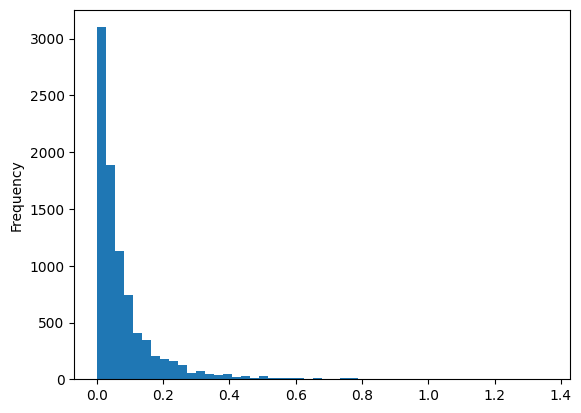

In [30]:
df['median_gyr_x'].plot(kind='hist', bins=50)

In [37]:
"""
# Remove outliers according to above histogram
df_clean = df[df['median_acc_z']<-0.5].reset_index(drop=True)
df_clean.head()
"""

"\n# Remove outliers according to above histogram\ndf_clean = df[df['median_acc_z']<-0.5].reset_index(drop=True)\ndf_clean.head()\n"

<Axes: ylabel='Frequency'>

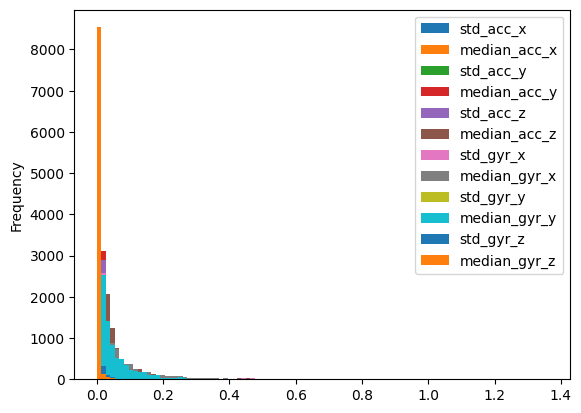

In [45]:
# check whether is the data have normal distribution or not
df[['std_acc_x', 'median_acc_x', 'std_acc_y', 'median_acc_y',
       'std_acc_z', 'median_acc_z', 'std_gyr_x', 'median_gyr_x', 'std_gyr_y',
       'median_gyr_y', 'std_gyr_z', 'median_gyr_z']].plot(kind='hist', bins=100)

<Axes: >

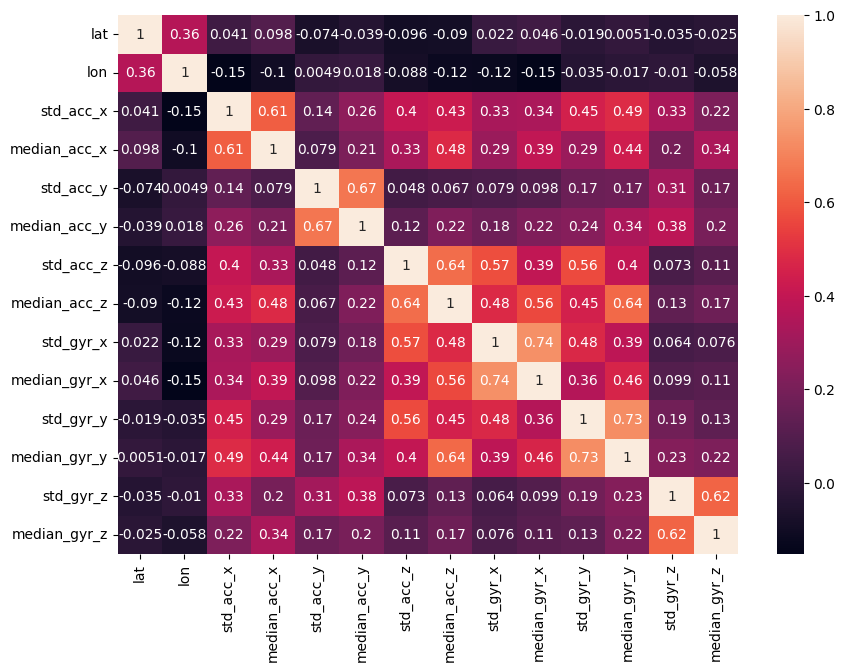

In [35]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)

In [368]:
fig = px.scatter_mapbox(lat=df['lat'], lon=df['lon'], color= df['median_acc_z'], zoom=10, width=500, height=500 , color_continuous_scale=px.colors.diverging.RdYlGn_r)
#fig.update_geos(scope='europe')
fig.update_geos(fitbounds="locations")
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
#fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(
    mapbox=dict(
    style="light", 
    accesstoken='pk.eyJ1Ijoicm9sYW5kbmFneSIsImEiOiJjbHRrZXptcWMweTJtMmlzNG40YjNmY3ozIn0.66tCRA-MiLLA-xAKcPiPlw',
    pitch=0,
    zoom=5
    )
)

fig.show()

# PCA

In [4]:
df.columns

Index(['lat', 'lon', 'std_acc_x', 'median_acc_x', 'std_acc_y', 'median_acc_y',
       'std_acc_z', 'median_acc_z', 'std_gyr_x', 'median_gyr_x', 'std_gyr_y',
       'median_gyr_y', 'std_gyr_z', 'median_gyr_z'],
      dtype='object')

In [5]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df[['std_acc_y', 'median_acc_y','std_acc_z', 'median_acc_z', 'std_gyr_x', 'median_gyr_x', 'std_gyr_y','median_gyr_y']])
df_pca = pd.DataFrame(pca.transform(df[['std_acc_y', 'median_acc_y','std_acc_z', 'median_acc_z', 'std_gyr_x', 'median_gyr_x', 'std_gyr_y','median_gyr_y']]))

[0.49895962 0.69448643 0.80679533 0.87461967 0.92750183 0.96555498
 0.9893668  1.        ]


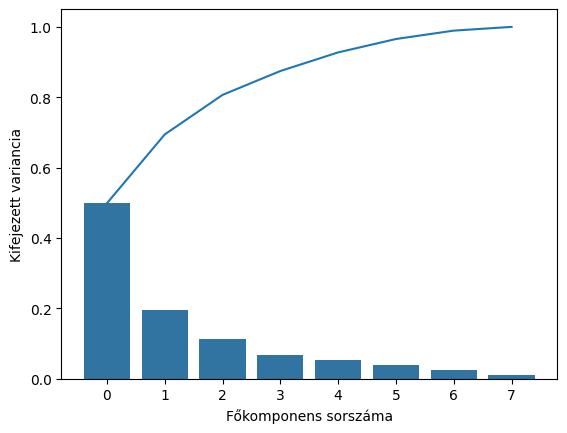

In [6]:
sns.barplot(x=np.arange(0,len(pca.explained_variance_ratio_)),y=pca.explained_variance_ratio_)
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel('Főkomponens sorszáma')
plt.ylabel('Kifejezett variancia')

print(pca.explained_variance_ratio_.cumsum())

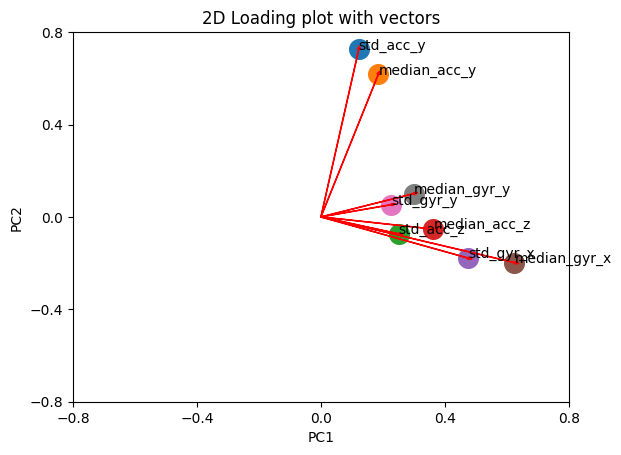

In [7]:
# Get the loadings of x and y axes
xs = pca.components_[0]
ys = pca.components_[1]
 
# Plot the loadings on a scatterplot
for i, varnames in enumerate(['std_acc_y', 'median_acc_y','std_acc_z', 'median_acc_z', 'std_gyr_x', 'median_gyr_x', 'std_gyr_y','median_gyr_y']):
    plt.scatter(xs[i], ys[i], s=200)
    plt.arrow(
        0, 0, # coordinates of arrow base
        xs[i], # length of the arrow along x
        ys[i], # length of the arrow along y
        color='r', 
        head_width=0.01
        )
    plt.text(xs[i], ys[i], varnames)
 
# Define the axes
xticks = np.linspace(-0.8, 0.8, num=5)
yticks = np.linspace(-0.8, 0.8, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')
 
# Show plot
plt.title('2D Loading plot with vectors')
plt.show()

<Axes: >

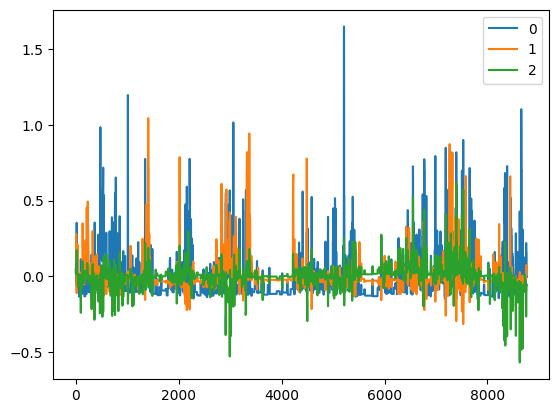

In [8]:
df_pca[[0,1,2]].plot()

# Unsupervised Machine learning

In [11]:
#df_clean_new = df_clean.drop(index=df_clean[(df_clean['lon'] < 16.8435) & (df_clean['lat'] >46.8475)].index)

In [153]:
df.columns

Index(['lat', 'lon', 'std_acc_x', 'median_acc_x', 'std_acc_y', 'median_acc_y',
       'std_acc_z', 'median_acc_z', 'std_gyr_x', 'median_gyr_x', 'std_gyr_y',
       'median_gyr_y', 'std_gyr_z', 'median_gyr_z'],
      dtype='object')

In [53]:
# with segmentation
#X = df_clean_new.drop(columns=['lat','lon','std_acc_x', 'median_acc_x', 'std_acc_y', 'median_acc_y','std_gyr_y',
#       'median_gyr_y', 'std_gyr_z', 'median_gyr_z'],axis=1)
#X.columns = [0,1,2,3]

"""
X = df_clean_new.drop(columns=['lat','lon','std_acc_x','std_acc_y','std_acc_z','std_gyr_x','std_gyr_y','std_gyr_z','median_gyr_z'],axis=1) # so I keep: [['median_acc_x',']]
print(X.columns)
X.columns = [0,1,2,3,4]
"""


X = df.drop(columns=['lat','lon','std_acc_x','median_acc_x','std_gyr_z','median_gyr_z'],axis=1)
print(X.columns)
X.columns = [0,1,2,3,4,5,6,7]


"""
X = df.drop(columns=['lat','lon'],axis=1)
X.columns = [0,1,2,3]
"""

"""
X = df_pca[[0,1,2]]
"""

Index(['std_acc_y', 'median_acc_y', 'std_acc_z', 'median_acc_z', 'std_gyr_x',
       'median_gyr_x', 'std_gyr_y', 'median_gyr_y'],
      dtype='object')


'\nX = df_pca[[0,1,2]]\n'

In [54]:
# weights for features
weights = np.array([1, 2, 6, 15, 1, 2, 3, 5])
X = X * weights

In [9]:
# weights for pca
X = df_pca[[0,1,2]]

weights = np.array([10, 3, 1])
X = X * weights

In [73]:
len(X)

8753

In [378]:
"""
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

# Scale the featuresX

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))
"""


<Axes: ylabel='Frequency'>

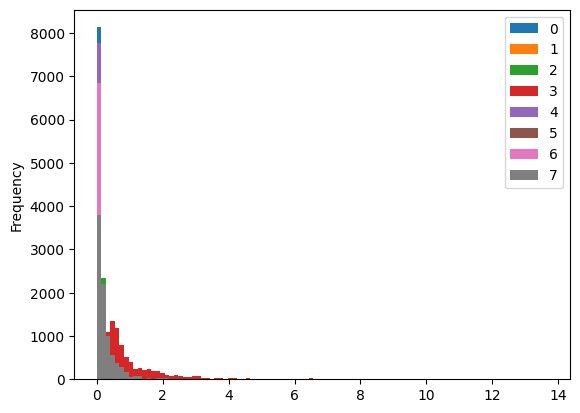

In [89]:
X.plot(kind='hist', bins=100)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning:

invalid value encountered in log10



<Axes: ylabel='Frequency'>

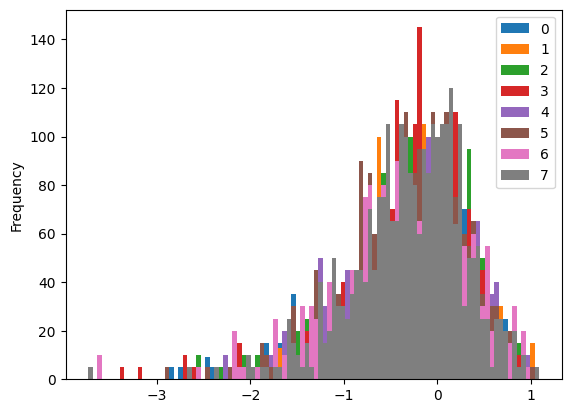

In [ ]:
#np.log10(X+0.0000001).plot(kind='hist', bins=100)

In [368]:
#X = np.log10(X+0.0000001)

In [369]:
#X = pd.DataFrame(StandardScaler().fit_transform(X))

<Axes: ylabel='Frequency'>

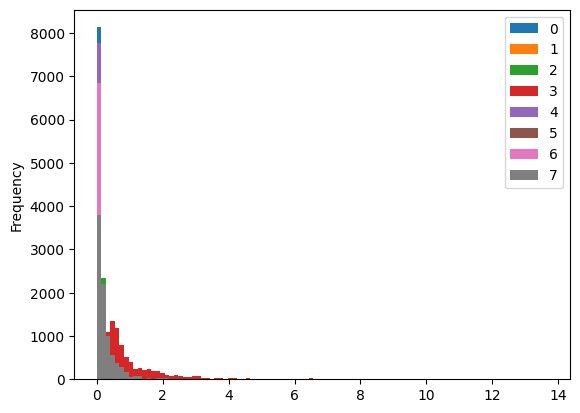

In [376]:
#X.plot(kind='hist', bins=100)

In [371]:
#X = X.drop(X[(X < -4.5).any(axis=1)].index)

# GMM

Final method:
- plot with pca fitted model
- FINAL model: weighted features fitted model

In [11]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [98]:
# Define the hyperparameter grid
param_grid = {
    "n_components": range(3, 8),  # Number of clusters to try
    "covariance_type": ["full", "tied", "diag", "spherical"],  # Covariance types
    "tol": [1e-4, 1e-3],  # Convergence tolerances
    "reg_covar": [1e-6, 1e-5],  # Regularization for numerical stability
    "max_iter": [300, 500]  # Maximum iterations
}

# Initialize variables to store the best results
best_gmm = None
best_params = None
best_score = -np.inf

# Perform grid search
for n_components in param_grid["n_components"]:
    for covariance_type in param_grid["covariance_type"]:
        for tol in param_grid["tol"]:
            for reg_covar in param_grid["reg_covar"]:
                for max_iter in param_grid["max_iter"]:
                    # Fit the Gaussian Mixture Model
                    gmm = GaussianMixture(
                        n_components=n_components,
                        covariance_type=covariance_type,
                        tol=tol,
                        reg_covar=reg_covar,
                        max_iter=max_iter,
                        random_state=42
                    )
                    gmm.fit(X.values)
                    
                    # Predict cluster labels and calculate Silhouette Score
                    labels = gmm.predict(X.values)
                    score = silhouette_score(X.values, labels)
                    
                    # Update the best model if the score improves
                    if score > best_score:
                        best_gmm = gmm
                        best_params = {
                            "n_components": n_components,
                            "covariance_type": covariance_type,
                            "tol": tol,
                            "reg_covar": reg_covar,
                            "max_iter": max_iter
                        }
                        best_score = score

# Output the best parameters and score
print("Best Parameters:", best_params)
print("Best Silhouette Score:", best_score)


Best Parameters: {'n_components': 3, 'covariance_type': 'tied', 'tol': 0.001, 'reg_covar': 1e-06, 'max_iter': 300}
Best Silhouette Score: 0.628391547874973


In [99]:
silhouute = []
aic_values = []
bic_values = []
log_likelihood = []

for k in range(2, 10):
    gmm = GaussianMixture(n_components=k, random_state=100, covariance_type='full', tol=0.001, max_iter=300)
    gmm.fit(X)
    labels = gmm.predict(X)
    silhouute.append(silhouette_score(X, labels))
        # Append AIC and BIC values
    aic_values.append(gmm.aic(X))
    bic_values.append(gmm.bic(X))
    log_likelihood.append(gmm.score(X) * len(X))

Text(0, 0.5, 'AIC and BIC')

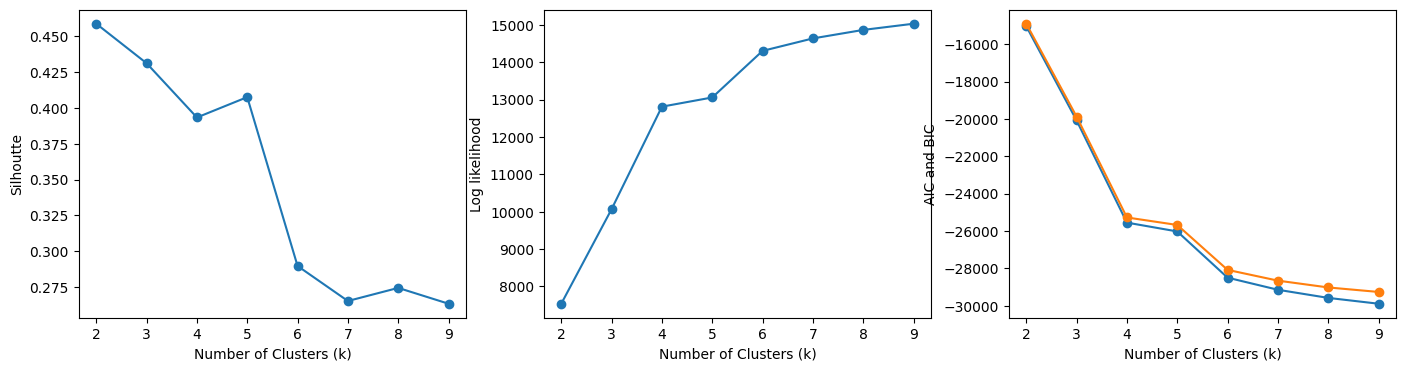

In [163]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17,4))

# Plot the elbow method
ax1.plot(range(2, 10), silhouute, marker='o')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Silhoutte')

ax2.plot(range(2, 10), log_likelihood, marker='o')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Log likelihood')

ax3.plot(range(2, 10), aic_values, marker='o')
ax3.plot(range(2, 10), bic_values, marker='o')
ax3.set_xlabel('Number of Clusters (k)')
ax3.set_ylabel('AIC and BIC')

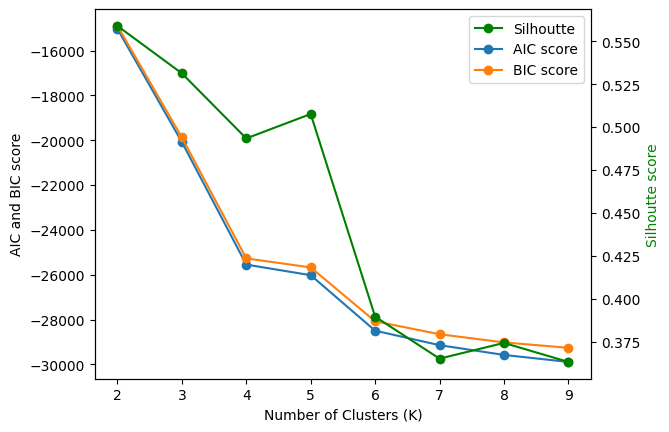

In [105]:
fig, ax = plt.subplots()

ax2 = ax.twinx()
lns2 = ax.plot(range(2, 10), aic_values, marker='o', label='AIC score')
lns3 = ax.plot(range(2, 10), bic_values, marker='o', label='BIC score')
lns1 = ax2.plot(range(2, 10), [i+0.1 for i in silhouute], marker='o', color='g', label='Silhoutte')

ax.set_xlabel('Number of Clusters (K)')
ax2.set_ylabel('Silhoutte score', color='g')
ax.set_ylabel('AIC and BIC score')

# added these three lines
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)


For n_clusters = 3 The average silhouette_score is : 0.4312838234378186
For n_clusters = 4 The average silhouette_score is : 0.39338996485809286
For n_clusters = 5 The average silhouette_score is : 0.40761225013484564


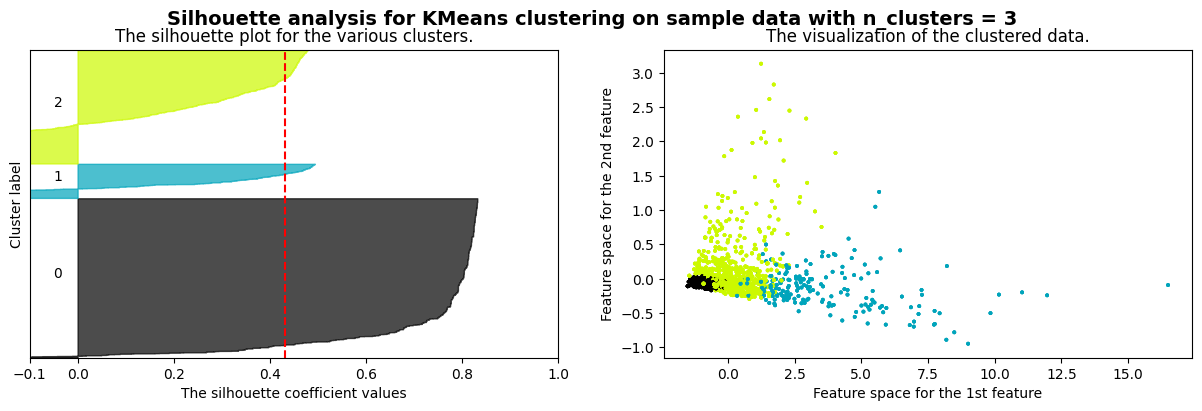

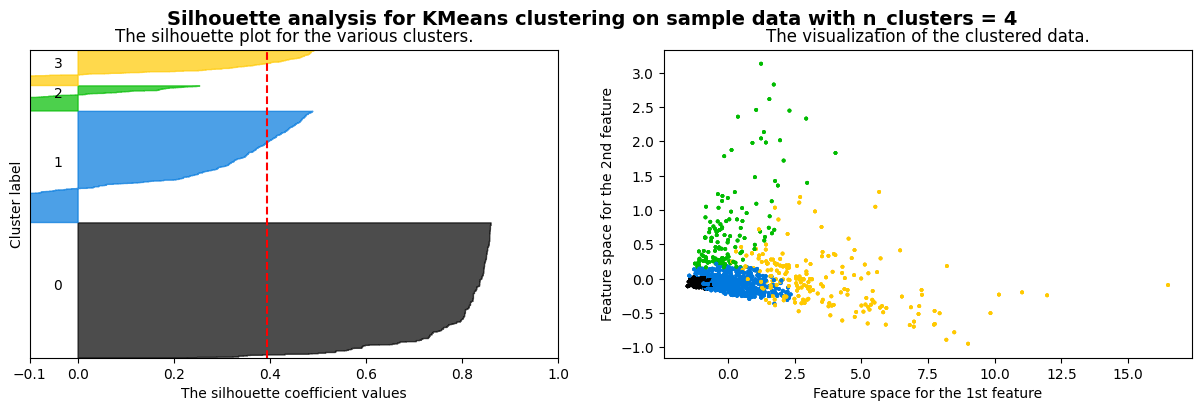

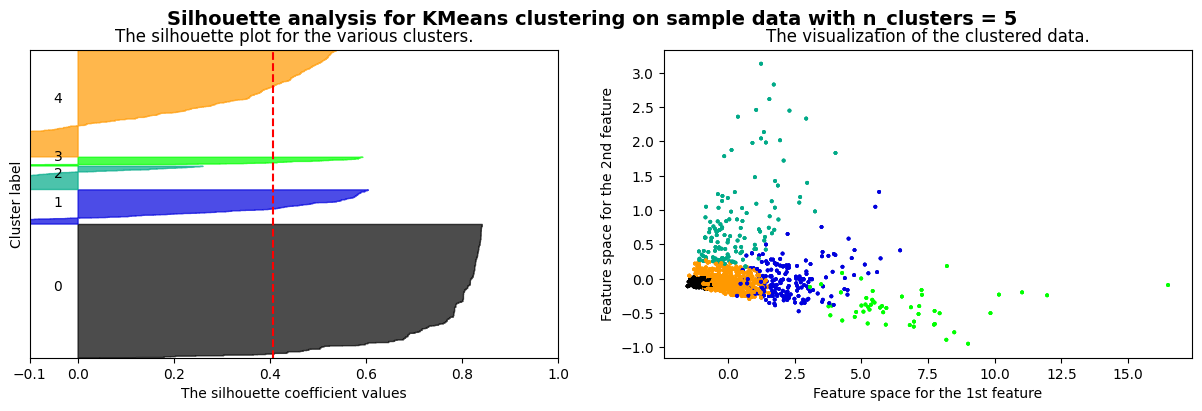

In [156]:
silhouette_scores = []

range_n_clusters = [3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 4)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = GaussianMixture(n_components=n_clusters, random_state=100)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    
    silhouette_scores.append(silhouette_avg)
    
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[0], X[1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )


    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [55]:
gmm = GaussianMixture(n_components=4, random_state=100, max_iter=500)
gmm.fit(X)
labels = gmm.predict(X)
probs = gmm.predict_proba(X)  # Each row contains probabilities for belonging to each cluster

In [47]:
print(gmm.bic(X))
print(gmm.aic(X))
print(silhouette_score(X, labels))
print(gmm.score(X) * len(X))

-56311.51740080861
-58106.57093694109
0.07656639304731
29416.285468470545


Text(0, 0.5, 'Count of data points')

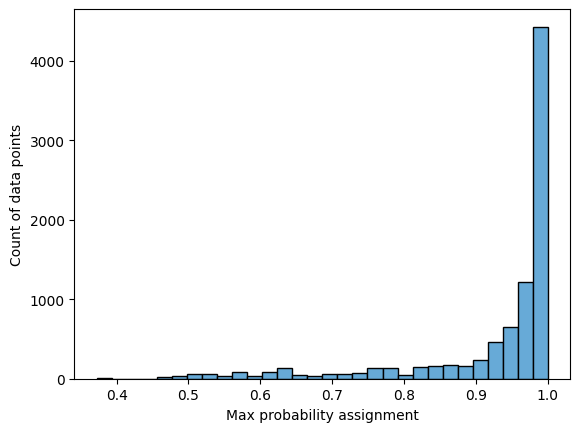

In [13]:
# Histogram of Cluster Confidence Levels
plt.hist(probs.max(axis=1), bins=30, color='#67AAD7', alpha=1, edgecolor='black')
plt.xlabel("Max probability assignment")
plt.ylabel("Count of data points")

In [48]:
i=0
probsperclass = pd.DataFrame(columns=['0','1','2','3'])
for k in labels:
    if k == 0:
        new_row = pd.DataFrame({'0': [probs[i, k]]})
        probsperclass = pd.concat([probsperclass, new_row], ignore_index=True)
    i+=1

new_row = pd.DataFrame()
i=0
for k in labels:
    if k == 1:
        new_row = pd.DataFrame({'1': [probs[i, k]]})
        probsperclass = pd.concat([probsperclass, new_row], ignore_index=True)
    i+=1
    
new_row = pd.DataFrame()
i=0
for k in labels:
    if k == 2:
        new_row = pd.DataFrame({'2': [probs[i, k]]})
        probsperclass = pd.concat([probsperclass, new_row], ignore_index=True)
    i+=1
    
new_row = pd.DataFrame()
i=0
for k in labels:
    if k == 3:
        new_row = pd.DataFrame({'3': [probs[i, k]]})
        probsperclass = pd.concat([probsperclass, new_row], ignore_index=True)
    i+=1

/var/folders/w_/802pn39d4f75d8__y1zs9yxm0000gn/T/ipykernel_879/1566237202.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  probsperclass = pd.concat([probsperclass, new_row], ignore_index=True)
/var/folders/w_/802pn39d4f75d8__y1zs9yxm0000gn/T/ipykernel_879/1566237202.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  probsperclass = pd.concat([probsperclass, new_row], ignore_index=True)
/var/folders/w_/802pn39d4f75d8__y1zs9yxm0000gn/T/ipykernel_879/1566237202.py:22: FutureWarning: The behav

Text(0, 0.5, 'Normalized count of data points')

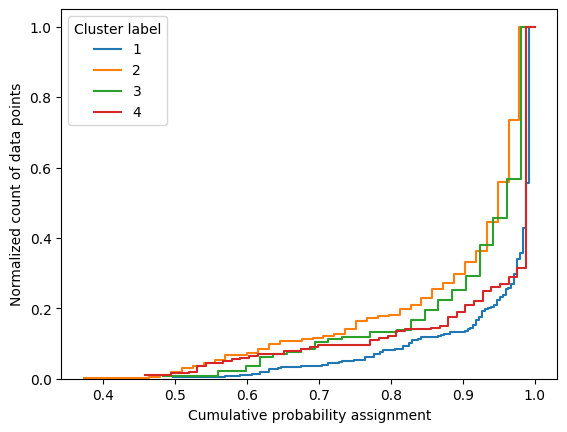

In [97]:
sns.histplot(data=probsperclass['0'],cumulative=True,element="step",stat='proportion', fill=False, label='1')
sns.histplot(data=probsperclass['1'],cumulative=True,element="step",stat='proportion', fill=False, label='2')
sns.histplot(data=probsperclass['2'],cumulative=True,element="step",stat='proportion', fill=False, label='3')
sns.histplot(data=probsperclass['3'],cumulative=True,element="step",stat='proportion', fill=False, label='4')
plt.legend(title='Cluster label')
plt.xlabel("Cumulative probability assignment")
plt.ylabel("Normalized count of data points")

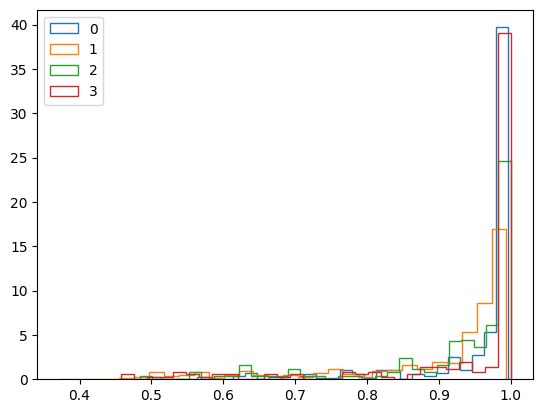

In [65]:
plt.hist(probsperclass['0'], bins=30, histtype='step', label='0', density=True, stacked=True);
plt.hist(probsperclass['1'], bins=30, histtype='step', label='1', density=True);
plt.hist(probsperclass['2'], bins=30, histtype='step', label='2', density=True);
plt.hist(probsperclass['3'], bins=30, histtype='step', label='3', density=True);
plt.legend()

In [106]:
pd.DataFrame(labels).value_counts()

0
0    3863
1    3182
3    1000
2     718
Name: count, dtype: int64

<Axes: ylabel='median_acc_z'>

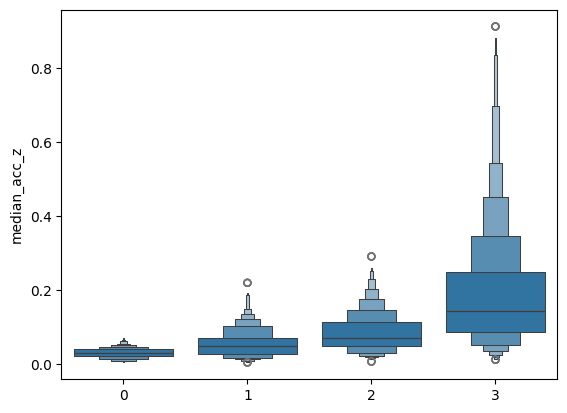

In [352]:
sns.boxenplot(x=labels,y=df['median_acc_z'])

## K-Means

In [23]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score, calinski_harabasz_score

For n_clusters = 2 The average silhouette_score is : 0.6181564216475947
For n_clusters = 3 The average silhouette_score is : 0.6158775627578302
For n_clusters = 4 The average silhouette_score is : 0.4758701726535883
For n_clusters = 5 The average silhouette_score is : 0.4350863724255523
For n_clusters = 6 The average silhouette_score is : 0.44572672134513625
For n_clusters = 7 The average silhouette_score is : 0.41848985300463937
For n_clusters = 8 The average silhouette_score is : 0.43985095798777724
For n_clusters = 9 The average silhouette_score is : 0.3795422895224803
For n_clusters = 10 The average silhouette_score is : 0.38296558042959017


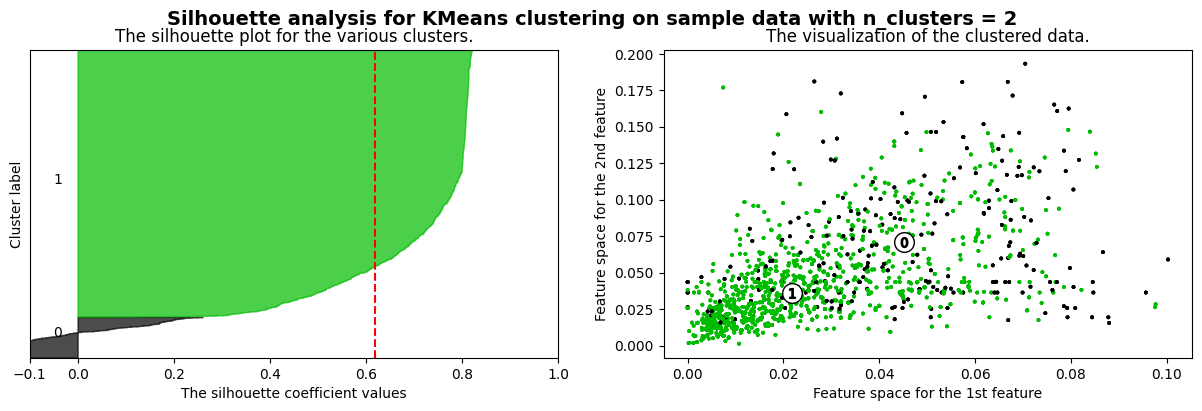

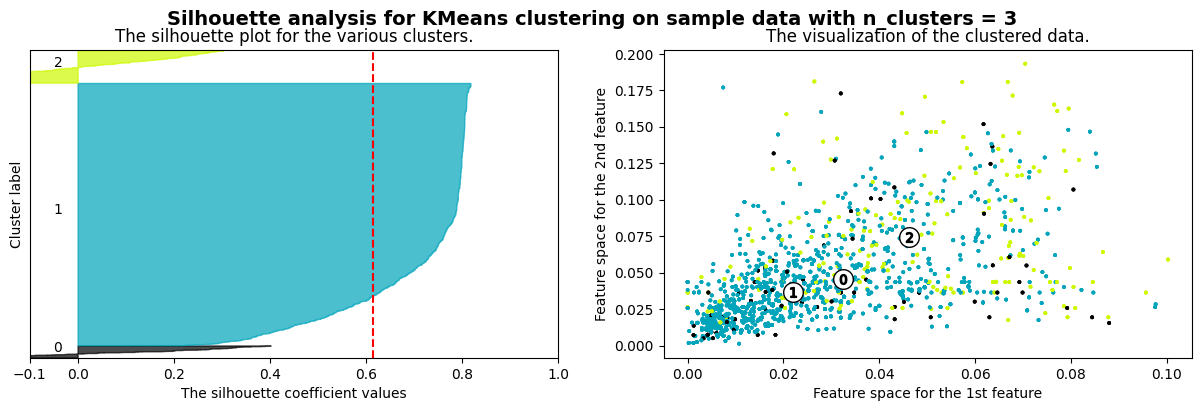

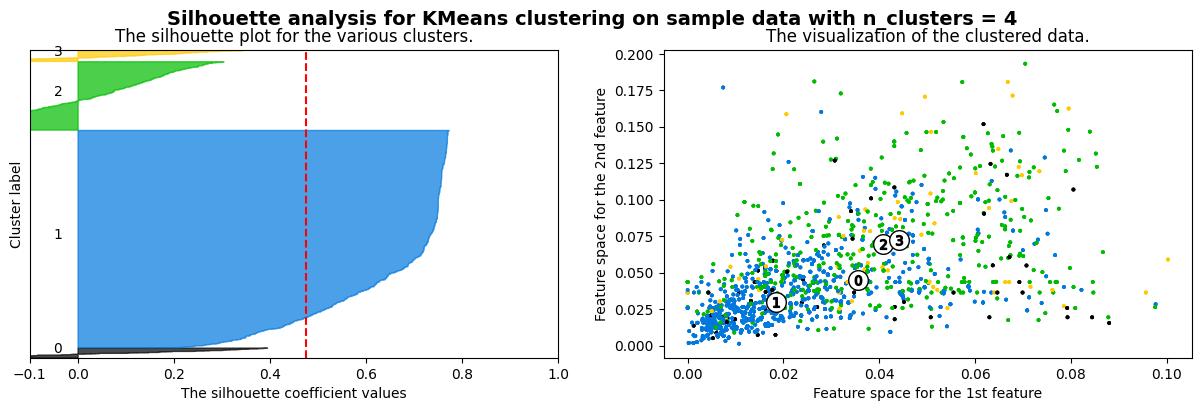

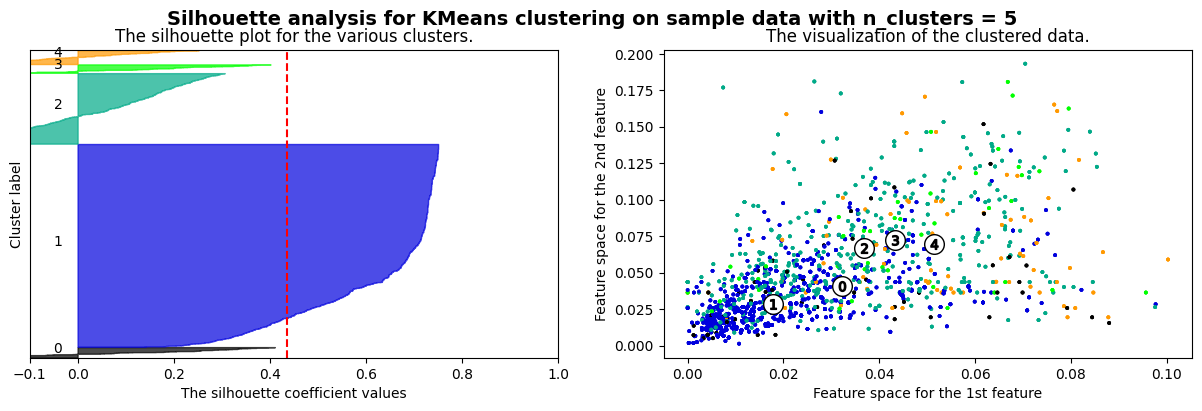

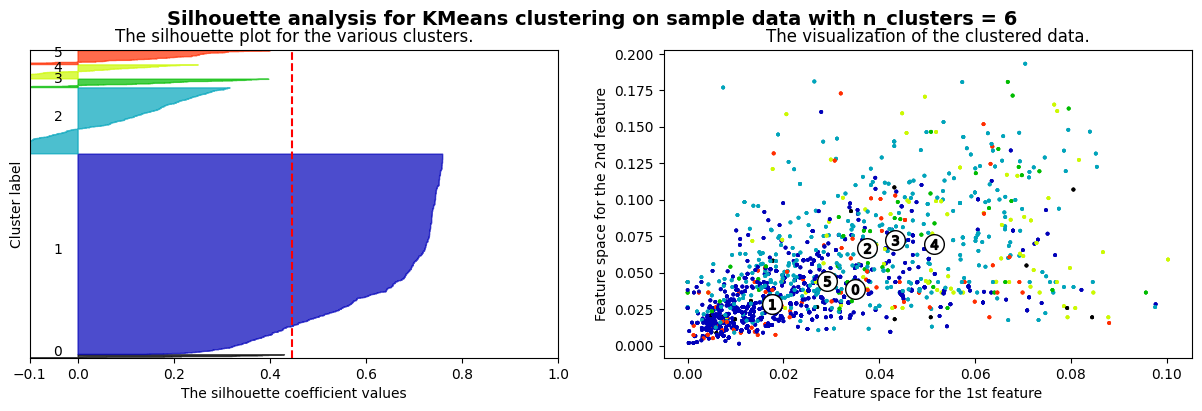

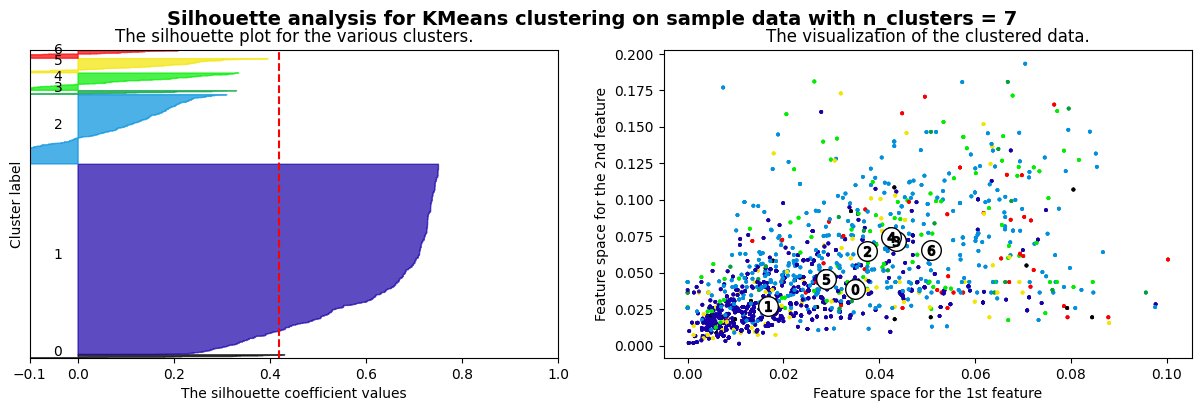

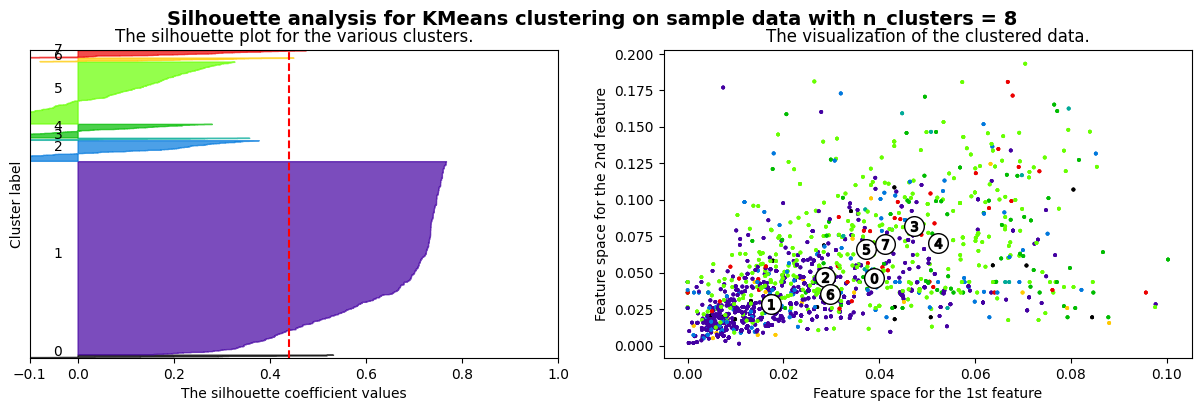

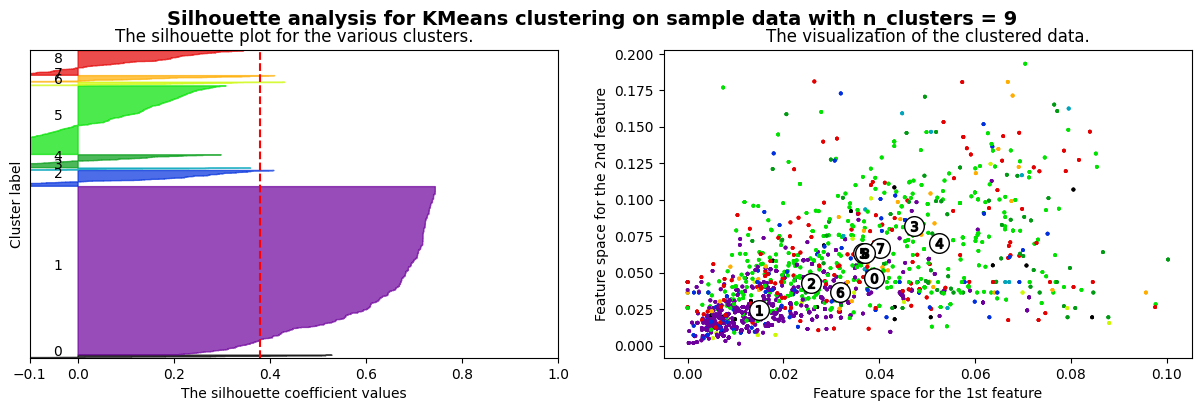

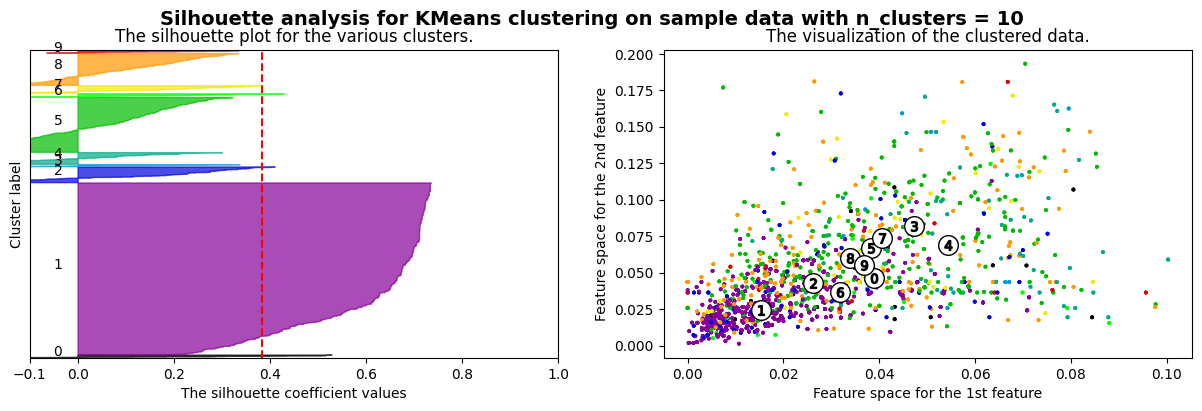

In [181]:
import matplotlib.cm as cm


range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_scores = []
wcss = []
calinski_harabasz = []

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 4)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    
    silhouette_scores.append(silhouette_avg)
    wcss.append(clusterer.inertia_)
    calinski_harabasz.append(calinski_harabasz_score(X, clusterer.labels_))
    
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[0], X[1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

# Runtime: 

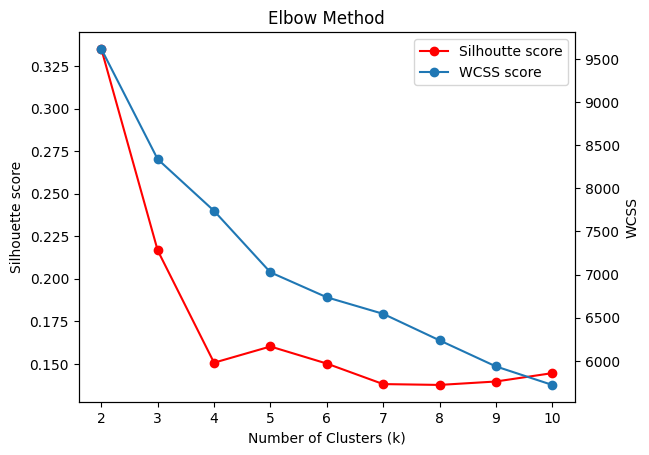

In [172]:
# Silhouette and WCSS scores on elbow plot

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

lns1 = ax1.plot(range(2, 11), silhouette_scores, marker='o', color='r', label='Silhoutte score')
lns2 = ax2.plot(range(2, 11), wcss, marker='o', label='WCSS score')

ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Silhouette score')
ax2.set_ylabel('WCSS')
ax1.set_title('Elbow Method')


# added these three lines
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

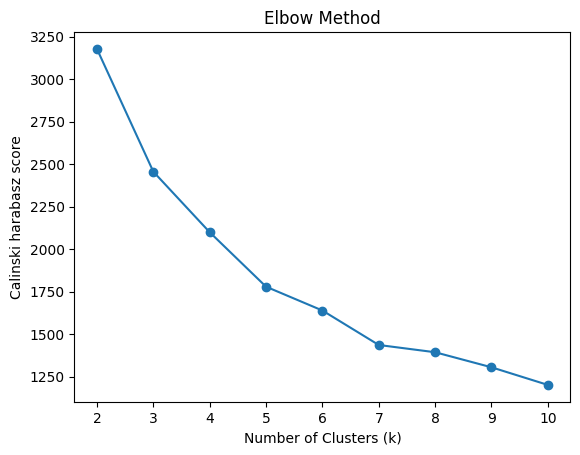

In [16]:
# calinski_harabasz score
plt.plot(range(2, 11), calinski_harabasz, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski harabasz score')
plt.title('Elbow Method')
plt.show()

In [ ]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
# Plot the elbow method
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [18]:
# scores when cluster number = 4
print(silhouette_scores[2])
print(wcss[2])
print(calinski_harabasz[2])

0.22078641197792476
34236.98273456433
2098.9404522962973


In [332]:
fig = px.scatter_mapbox(lat=df['lat'], lon=df['lon'], color = labels, zoom=10, width=500, height=500 , color_continuous_scale=px.colors.diverging.RdYlGn_r)
#fig.update_geos(scope='europe')
fig.update_geos(fitbounds="locations")
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
#fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(
    mapbox=dict(
    style="light", 
    accesstoken='pk.eyJ1Ijoicm9sYW5kbmFneSIsImEiOiJjbHRrZXptcWMweTJtMmlzNG40YjNmY3ozIn0.66tCRA-MiLLA-xAKcPiPlw',
    pitch=0,
    zoom=5
    )
)

fig.show()

In [56]:
scaler = MinMaxScaler(feature_range=(0, 9))
plot_color = pd.DataFrame(scaler.fit_transform(df_clean[['median_acc_z']]))

In [58]:
fig = px.scatter_mapbox(lat=df_clean['lat'], lon=df_clean['lon'], color= plot_color[0]*(-1)+9, zoom=10, width=500, height=500 , color_continuous_scale=px.colors.diverging.RdYlGn)
#fig.update_geos(scope='europe')
fig.update_geos(fitbounds="locations")
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
#fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(
    mapbox=dict(
    style="light", 
    accesstoken='pk.eyJ1Ijoicm9sYW5kbmFneSIsImEiOiJjbHRrZXptcWMweTJtMmlzNG40YjNmY3ozIn0.66tCRA-MiLLA-xAKcPiPlw',
    pitch=0,
    zoom=5))
fig.show()

## Final model

In [227]:
cluster_labels[cluster_labels == 1] = 5
cluster_labels[cluster_labels == 2] = 1
cluster_labels[cluster_labels == 5] = 2

In [210]:
labels[labels == 1] = 5
labels[labels == 3] = 1
labels[labels == 5] = 3

In [452]:
cluster_labels[cluster_labels == 1] = 10
cluster_labels[cluster_labels == 2] = 1
cluster_labels[cluster_labels == 10] = 2

In [44]:
cluster_labels[cluster_labels == 3] = 15
cluster_labels[cluster_labels == 2] = 3
cluster_labels[cluster_labels == 15] = 2

In [105]:
cluster_labels[cluster_labels == 3] = 20
cluster_labels[cluster_labels == 2] = 3
cluster_labels[cluster_labels == 20] = 2

In [108]:
cluster_labels[cluster_labels == 3] = 25
cluster_labels[cluster_labels == 2] = 3
cluster_labels[cluster_labels == 25] = 2

## Export labelled data

## Supervised model

In [13]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, f1_score, ConfusionMatrixDisplay, roc_auc_score
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

### Create X and y

In [56]:
#for_ml = df_clean_new.copy()
#for_ml.reset_index(drop=True, inplace=True)
#for_ml[['std_acc_x', 'median_acc_x', 'std_acc_y', 'median_acc_y','std_acc_z', 'median_acc_z', 'std_gyr_x', 'median_gyr_x', 'std_gyr_y','median_gyr_y', 'std_gyr_z', 'median_gyr_z']] = pd.DataFrame(scaler.fit_transform(df_clean_new[['std_acc_x', 'median_acc_x', 'std_acc_y', 'median_acc_y','std_acc_z', 'median_acc_z', 'std_gyr_x', 'median_gyr_x', 'std_gyr_y','median_gyr_y', 'std_gyr_z', 'median_gyr_z']])).copy()
ml = pd.concat([df.reset_index(drop=True), pd.DataFrame(labels)], axis=1)

In [57]:
ml.drop_duplicates(subset='std_acc_x', inplace=True)

In [58]:
ml

lat        lon  std_acc_x  median_acc_x  std_acc_y  median_acc_y  \
0     46.844259  16.865110   0.017228      0.036328   0.081825      0.103029   
5     46.844514  16.863257   0.010745      0.036328   0.312470      0.160742   
10    46.844815  16.861801   0.044812      0.036328   0.104852      0.032883   
15    46.844716  16.861417   0.073428      0.119436   0.032490      0.062816   
20    46.844472  16.861350   0.038323      0.036328   0.030490      0.080083   
...         ...        ...        ...           ...        ...           ...   
8724  46.826954  16.830171   0.046145      0.038521   0.004589      0.016089   
8729  46.826818  16.830140   0.016024      0.031791   0.008807      0.013007   
8744  46.826419  16.830026   0.035467      0.092929   0.023219      0.034847   
8749  46.826243  16.829995   0.070255      0.088165   0.030341      0.163072   
8754  46.826034  16.829935   0.030101      0.025698   0.053567      0.153389   

      std_acc_z  median_acc_z  std_gyr_x  median_gyr_x  std_gyr_y  \
0      0.079534      0.050651   0.096654      0.094314   0.006877   
5      0.005578      0.021772   0.028609      0.038528   0.011810   
10     0.014936      0.047595   0.018966      0.055330   0.012804   
15     0.071064      0.075694   0.447334      0.318123   0.049171   
20     0.003260      0.028895   0.013730      0.042006   0.005440   
...         ...           ...        ...           ...        ...   
8724   0.054820      0.122993   0.268453      0.101113   0.066476   
8729   0.045033      0.063044   0.008679      0.007229   0.032153   
8744   0.061500      0.092279   0.049120      0.040287   0.039862   
8749   0.131578      0.305818   0.088951      0.073390   0.179854   
8754   0.039576      0.132030   0.080071      0.137673   0.150875   

      median_gyr_y  std_gyr_z  median_gyr_z  0  
0         0.039483   0.002751      0.000763  3  
5         0.017738   0.016606      0.003414  3  
10        0.055418   0.014585      0.000763  3  
15        0.104757   0.016910      0.007653  1  
20        0.037693   0.028886      0.000763  3  
...            ...        ...           ... ..  
8724      0.059542   0.005284      0.005978  1  
8729      0.054375   0.005998      0.003271  2  
8744      0.093076   0.013863      0.021644  2  
8749      0.245131   0.031817      0.018963  1  
8754      0.198425   0.046479      0.001986  1  

[1038 rows x 15 columns]

In [59]:
X = ml.drop(columns=['lat','lon',0],axis=1)
y = ml[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### RF model

In [375]:
# Choosing correct number of trees
test_error = []

for n in range(1,40):
    # Use n random trees
    model = RandomForestClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds,y_test))

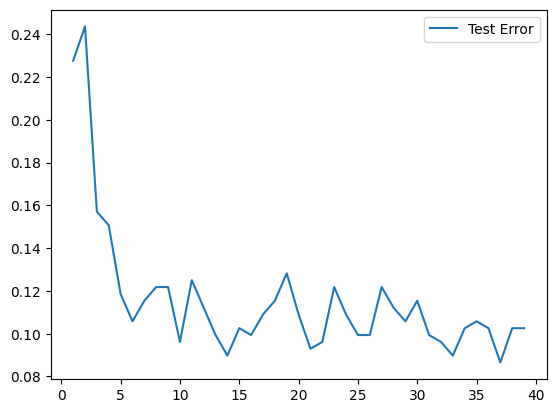

In [376]:
plt.plot(range(1,40),test_error,label='Test Error')
plt.legend()

In [ ]:
n_estimators=[20, 40, 64,100,128,200]
bootstrap = [True,False]
oob_score = [True,False]

param_grid = {'n_estimators':n_estimators,
             'bootstrap':bootstrap,
             'oob_score':oob_score}  # Note, oob_score only makes sense when bootstrap=True!

In [281]:
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc,param_grid)

In [282]:
grid.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:615: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:615: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:615: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:615: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.

/Library/Fra

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [20, 40, 64, 100, 128, 200, 400],
                         'oob_score': [True, False]})

In [283]:
grid.best_params_

{'bootstrap': False,
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 64,
 'oob_score': False}

In [284]:
predictions = grid.predict(X_test)

In [285]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93        63
           1       0.93      0.94      0.93        67
           2       0.90      0.92      0.91       118
           3       0.87      0.91      0.89        64

    accuracy                           0.91       312
   macro avg       0.92      0.91      0.91       312
weighted avg       0.92      0.91      0.91       312



### GBM model

In [278]:
param_grid = {"n_estimators":[1,5,10,20,40,100],'max_depth':[3,4,5,6]}

gb_model = GradientBoostingClassifier()

grid = GridSearchCV(gb_model,param_grid)

grid.fit(X_train,y_train)

print(grid.best_params_)

predictions = grid.predict(X_test)

print(classification_report(y_test,predictions))

{'max_depth': 4, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        63
           1       0.94      0.87      0.90        67
           2       0.90      0.92      0.91       118
           3       0.88      0.92      0.90        64

    accuracy                           0.91       312
   macro avg       0.91      0.91      0.91       312
weighted avg       0.91      0.91      0.91       312



### Fit the final model: RF

In [60]:
model = RandomForestClassifier(n_estimators=400,random_state=101, bootstrap=False, oob_score=False)

In [61]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, n_estimators=400, random_state=101)

<Axes: >

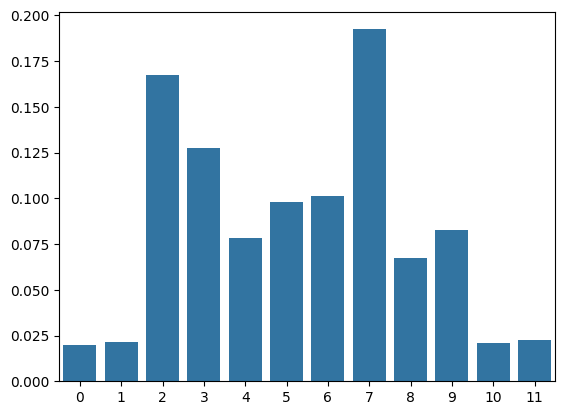

In [42]:
sns.barplot(model.feature_importances_)

[Text(0.5, 0, 'Prediktált címke'), Text(0, 0.5, 'Valós címke')]

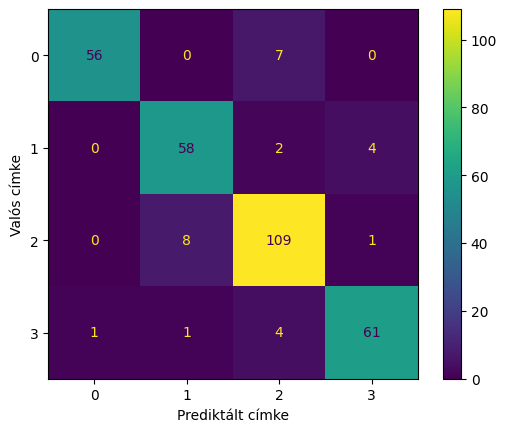

In [62]:
preds = model.predict(X_test)

cm = confusion_matrix(y_test, preds, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
disp.ax_.set(xlabel='Prediktált címke', ylabel='Valós címke')

Text(448.4027777777778, 0.5, 'Power-based scale [%]')

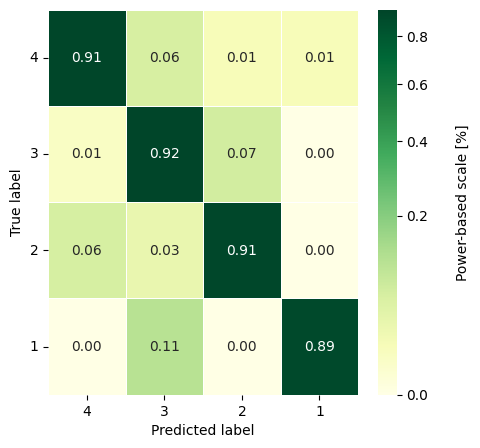

In [63]:
from matplotlib.colors import PowerNorm

# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(5,5))
#sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=['Excellent', 'Good', 'Fair', 'Poor'], yticklabels=['Excellent', 'Good', 'Fair', 'Poor'])#np.unique(y_test))
heatmap = sns.heatmap(np.fliplr(np.flipud(cmn)),  annot=True, fmt='.2f', linewidths=0.4, linecolor= 'white', xticklabels=['4', '3', '2', '1'], yticklabels=['4', '3', '2', '1'], norm=PowerNorm(gamma=0.5), cmap="YlGn") #or crest_r cmap
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')

ax.tick_params(axis='x', rotation=0)
ax.tick_params(axis='y', rotation=0)
#ax.show(block=False)

# Customize the colorbar
colorbar = heatmap.collections[0].colorbar
colorbar.ax.set_ylabel('Power-based scale [%]', rotation=90, labelpad=20)

In [45]:
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90        70
           1       0.89      0.95      0.92       150
           2       0.89      0.87      0.88        39
           3       0.91      0.92      0.92        53

    accuracy                           0.91       312
   macro avg       0.92      0.89      0.90       312
weighted avg       0.91      0.91      0.91       312



In [363]:
roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')

0.98456573886477

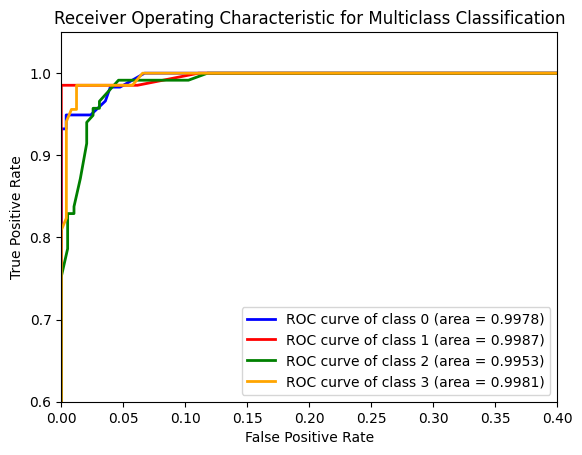

In [ ]:
# First aggregate all false positive rates

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
n_classes = len(np.unique(ml[0]))  # Number of unique classes
y_bin = label_binarize(ml[0], classes=np.arange(n_classes))

# Split into train and test (assuming you haven't already)
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.3, random_state=42)

y_score = model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
colors = ['blue', 'red', 'green', 'orange', 'purple']  # Adjust colors for your classes

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i % len(colors)], lw=2,
             label='ROC curve of class {0} (area = {1:0.4f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
plt.xlim([0.0, 0.4])
plt.ylim([0.6, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multiclass Classification')
plt.legend(loc="lower right")
plt.show()

In [297]:
roc_auc_score(y_test, model.predict_proba(X_test))

0.9974887422523837

In [255]:
fig = px.scatter_mapbox(lat=df['lat'], lon=df['lon'], color = model.predict(df.drop(columns=['lat','lon'],axis=1)), zoom=10, width=500, height=500 , color_continuous_scale=px.colors.diverging.RdYlGn_r)
#fig.update_geos(scope='europe')
fig.update_geos(fitbounds="locations")
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
#fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(
    mapbox=dict(
    style="light", 
    accesstoken='pk.eyJ1Ijoicm9sYW5kbmFneSIsImEiOiJjbHRrZXptcWMweTJtMmlzNG40YjNmY3ozIn0.66tCRA-MiLLA-xAKcPiPlw',
    pitch=0,
    zoom=5
    )
)

fig.show()

In [378]:
from mappymatch.constructs.trace import Trace

In [380]:
trace = Trace.from_dataframe(df.reset_index(drop=True), lat_column="lat", lon_column="lon", xy=True)

In [381]:
from mappymatch.constructs.geofence import Geofence

geofence = Geofence.from_trace(trace, padding=1e3)

In [382]:
from mappymatch.maps.nx.nx_map import NxMap, NetworkType

nx_map = NxMap.from_geofence(geofence, network_type=NetworkType.DRIVE)

In [383]:
from mappymatch.utils.plot import plot_map
plot_map(nx_map)

In [384]:
from mappymatch.matchers.lcss.lcss import LCSSMatcher

matcher = LCSSMatcher(nx_map)

match_result = matcher.match_trace(trace)

In [385]:
df_matched = match_result.matches_to_dataframe()

In [386]:
#df_matched['quality'] = model.predict(df.drop(columns=['lat','lon'],axis=1))
#df_matched.head()

In [387]:
# https://gis.stackexchange.com/questions/416284/splitting-multiline-or-linestring-into-equal-segments-of-particular-length-using

from shapely.geometry import LineString, Point, MultiPoint
from shapely.ops import split,snap

def cut(line, distance, lines):
     # Cuts a line in several segments at a distance from its starting point
     if distance <= 0.0 or distance >= line.length:
         return [LineString(line)]
     coords = list(line.coords)
     for i, p in enumerate(coords):
         pd = line.project(Point(p))
         if pd == distance:
             return [
                 LineString(coords[:i+1]),
                 LineString(coords[i:])
                 ]
         if pd > distance:
             cp = line.interpolate(distance)
             lines.append(LineString(coords[:i] + [(cp.x, cp.y)]))
             line = LineString([(cp.x, cp.y)] + coords[i:])
             if line.length > distance:
                 cut(line, distance, lines)
             else:
                 lines.append(LineString([(cp.x, cp.y)] + coords[i:]))
             return lines

In [388]:
df_splitted = pd.Series()
#df_splitted = []

# Iterate through every row (every linestring in the df)
distance_delta = 2
for i in range(len(df_matched)):
    line = df_matched['geom'].iloc[i]
    splitted = cut(line, distance_delta, list())
    df_splitted = pd.concat([df_splitted, pd.Series(splitted)], ignore_index=True)
    #df_splitted.extend(splitted)

NameError: name 'geopandas' is not defined

In [389]:
import geopandas

df_splitted.columns = ['geom']
#gdf_splitted = geopandas.GeoDataFrame(df_splitted, geometry=df_splitted.geom, crs="EPSG:3857")
gdf_splitted = geopandas.GeoSeries(df_splitted, crs="EPSG:3857")

In [400]:
# Interpolate the quality column
from scipy.interpolate import griddata

coordinates = np.vstack((gdf_splitted.to_crs(4326).centroid.y, gdf_splitted.to_crs(4326).centroid.x)).T
coordinates

# Prepare the known and unknown data points
known_points = np.vstack((df['lat'], df['lon'])).T
known_values = model.predict(df.drop(columns=['lat','lon'],axis=1))
missing_points = coordinates

# Interpolate missing values using griddata
interpolated_quality = griddata(known_points, known_values, missing_points, method='nearest')

/var/folders/w_/802pn39d4f75d8__y1zs9yxm0000gn/T/ipykernel_11202/2564464318.py:4: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




In [401]:
d = {'quality': interpolated_quality, 'geometry': list(gdf_splitted)} #['geometry']

In [402]:
gdf_new = geopandas.GeoDataFrame(d, crs="EPSG:3857")

In [404]:
# save file

#    ----   #    gdf_new.to_file('./../../data-labelled/dataframe.json', driver='GeoJSON')

# Plotting

In [2]:
import geopandas as gpd
gdf_new = gpd.read_file('./../../data-labelled/dataframe.json')

In [3]:
from shapely.geometry import LineString

## Concat the connected quality linestrings

# Lists to store merged LineStrings and their corresponding qualities
merged_lines = []
qualities = []
current_line = None
current_quality = None

# Iterate through rows in the GeoDataFrame
for idx, row in gdf_new.iterrows():
    geometry = row['geometry']
    quality = row['quality']
    
    # If the quality changes or there's no current line, add the previous line to the list
    if current_quality != quality or current_line is None:
        if current_line is not None:
            merged_lines.append(current_line)
            qualities.append(current_quality)  # Append the quality for the merged line
        current_line = geometry
        current_quality = quality
    else:
        # If the quality is the same, check if we can merge the current geometry with the previous one
        if current_line.bounds[2] == geometry.bounds[0]:  # Check if the end of current_line matches the start of geometry
            current_line = LineString(list(current_line.coords) + list(geometry.coords))
        else:
            merged_lines.append(current_line)
            qualities.append(current_quality)  # Append the quality for the merged line
            current_line = geometry

# Add the last line if any
if current_line is not None:
    merged_lines.append(current_line)
    qualities.append(current_quality)  # Append the quality for the merged line

# Create a new GeoDataFrame with the merged lines and corresponding qualities
merged_gdf = gpd.GeoDataFrame({
    'geometry': merged_lines,
    'quality': qualities
})

# Set the same CRS as the original data
merged_gdf.set_crs(gdf_new.crs, allow_override=True, inplace=True)

geometry  quality
0        LINESTRING (1877427.691 5916680.505, 1877425.7...        1
1        LINESTRING (1877425.714 5916680.207, 1877423.7...        1
2        LINESTRING (1877423.736 5916679.909, 1877421.7...        1
3        LINESTRING (1877421.759 5916679.610, 1877419.7...        1
4        LINESTRING (1877419.781 5916679.312, 1877417.8...        1
...                                                    ...      ...
1981060  LINESTRING (1873502.688 5913694.681, 1873501.7...        2
1981061  LINESTRING (1873501.743 5913696.444, 1873500.7...        2
1981062  LINESTRING (1873500.799 5913698.207, 1873499.8...        2
1981063  LINESTRING (1873499.854 5913699.969, 1873498.9...        2
1981064  LINESTRING (1873498.909 5913701.732, 1873498.0...        2

[1981065 rows x 2 columns]

In [4]:
merged_gdf_4326 = merged_gdf.to_crs(epsg=4326)

In [5]:
# create custom cmap
import matplotlib.colors

cvals  = [0, 1, 2, 3]
colors = ["#77bb41","#d1e15d","#ffc44a", "#ff4013"]

norm=plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm,cvals), colors))
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", tuples)

Text(208.02979922223136, 0.5, 'Latitude')

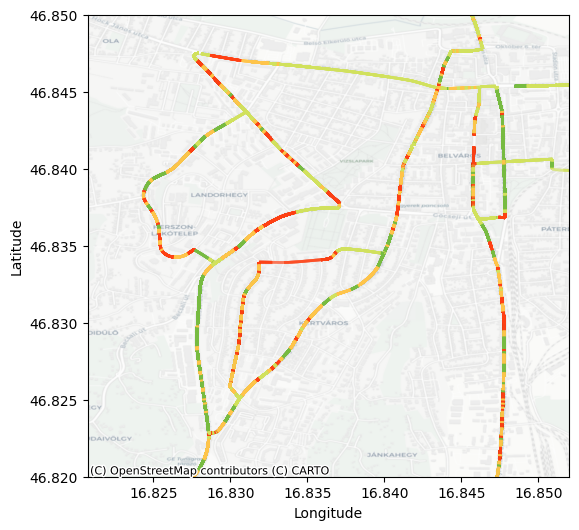

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
merged_gdf_4326.plot(ax=ax, column='quality', legend=False, cmap=cmap, linewidth=2) #RdYlGn_r

ax.set_xlim(right=16.852)
ax.set_ylim(bottom=46.82, top=46.85)
cx.add_basemap(ax, crs='EPSG:4326', source=cx.providers.CartoDB.Positron)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Plot with folium, interactively

In [ ]:
import folium
import geopandas as gpd
import json
from shapely.geometry import mapping

# Assuming gdf is already defined
# Example gdf (replace with actual data)
# gdf = gpd.GeoDataFrame({
#     'geometry': [LineString([(0, 0), (1, 1)]), LineString([(2, 2), (3, 3)])],
#     'quality': [-4, -2]
# })

#gdf_to_plot = gdf.copy()
gdf_to_plot = gdf_new.copy()
# Reproject the GeoDataFrame to WGS 84 (lat/lon)
gdf_to_plot = gdf_to_plot.to_crs(epsg=4326)

# Function to extract coordinates from GeoSeries
def extract_coordinates(geometries):
    coordinates = [list(mapping(geom)['coordinates']) for geom in geometries if geom.geom_type == 'LineString']
    return coordinates

# Extract coordinates based on quality
new_coords = extract_coordinates(gdf_to_plot[gdf_to_plot['quality'] == 3]['geometry'])
perfect_coords = extract_coordinates(gdf_to_plot[gdf_to_plot['quality'] == 2]['geometry'])
medium_coords = extract_coordinates(gdf_to_plot[gdf_to_plot['quality'] == 1]['geometry'])
bad_coords = extract_coordinates(gdf_to_plot[gdf_to_plot['quality'] == 0]['geometry'])

# Create the GeoJSON structure
states = {
    "type": "FeatureCollection",
    "features": [
        {
            "type": "Feature",
            "properties": {"party": "new"},
            "geometry": {
                "type": "MultiLineString",
                "coordinates": new_coords
            }
        },
        {
            "type": "Feature",
            "properties": {"party": "perfect"},
            "geometry": {
                "type": "MultiLineString",
                "coordinates": perfect_coords
            }
        },
        {
            "type": "Feature",
            "properties": {"party": "medium"},
            "geometry": {
                "type": "MultiLineString",
                "coordinates": medium_coords
            }
        },
        {
            "type": "Feature",
            "properties": {"party": "bad"},
            "geometry": {
                "type": "MultiLineString",
                "coordinates": bad_coords
            }
        }
    ]
}

# Save the GeoJSON data to a file
with open('states.json', 'w') as f:
    json.dump(states, f)

# Create a map centered on the USA
#m = folium.Map(tiles="cartodbpositron")

# Define a function to style the features
#def style_function(feature):
#    return {
#        'color': '#77bb41' if feature['properties']['party'] == 'new' else '#d1e15d' if feature['properties']['party'] == 'perfect' else '#ffc44a' if feature['properties']['party'] == 'medium' else '#ff4013',
#    }

# or fff76b color for medium quality

#'color': '#2DB544' if feature['properties']['party'] == 'new' else '#1ce375' if feature['properties']['party'] == 'perfect' else '#efe510' if feature['properties']['party'] == 'medium' else '#f1170e',

# Add the GeoJSON layer to the map
#folium.GeoJson(
#    states,
#    style_function=style_function
#).add_to(m)

#m.fit_bounds(m.get_bounds())
# If you want to display the map directly in a Jupyter Notebook, use:
#m

In [ ]:
import json

with open("states.json") as json_file:
    states = json.load(json_file)

In [ ]:
# Create a map centered on the USA
m = folium.Map(tiles="cartodbpositron")

# Define a function to style the features
def style_function(feature):
    return {
        'color': '#77bb41' if feature['properties']['party'] == 'new' else '#d1e15d' if feature['properties']['party'] == 'perfect' else '#ffc44a' if feature['properties']['party'] == 'medium' else '#ff4013',
    }

# or fff76b color for medium quality

#'color': '#2DB544' if feature['properties']['party'] == 'new' else '#1ce375' if feature['properties']['party'] == 'perfect' else '#efe510' if feature['properties']['party'] == 'medium' else '#f1170e',

# Add the GeoJSON layer to the map
folium.GeoJson(
    states,
    style_function=style_function
).add_to(m)

m.fit_bounds(m.get_bounds())
# If you want to display the map directly in a Jupyter Notebook, use:
m